### Student Information
Name: 杜政諺

Student ID: 108061542

GitHub ID: jack5252tw

Kaggle name: Yan

Kaggle private scoreboard snapshot:
![pic0](img/pic0.png)

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

## <center> Part I

In [2]:
import pandas as pd

#------------------------------------------------------------------------------
#-----Training data
#------------------------------------------------------------------------------
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

#------------------------------------------------------------------------------
#-----Testing data
#------------------------------------------------------------------------------
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

def Show_top_30_words_with_highest_word_frequency(data_df):

    vecterizer = CountVectorizer()
    count = vecterizer.fit_transform(data_df.text).toarray()
    Word_frequency = sum(count)
    Word = vecterizer.get_feature_names()

    df = pd.DataFrame()
    df['Word'] = Word
    df['Word_frequency'] = Word_frequency

    df = df.sort_values(by ='Word_frequency', ascending=False )

    return df.head(30)

print('Top 30 words in train :\n')
print(list(Show_top_30_words_with_highest_word_frequency(train_df)['Word']))
print('\n')
print('Top 30 words in test :\n')
print(list(Show_top_30_words_with_highest_word_frequency(test_df)['Word']))

Top 30 words in train :

['the', 'to', 'and', 'you', 'of', 'is', 'it', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'not', 'just', 'but', 'with', 'at', 'can', 'all', 'like', 'are', 'your', 'was', 'when', 'if']


Top 30 words in test :

['the', 'to', 'and', 'of', 'it', 'you', 'is', 'in', 'for', 'that', 'my', 'on', 'be', 'me', 'so', 'was', 'can', 'have', 'all', 'at', 'just', 'with', 'are', 'get', 'but', 'not', 'up', 'like', 'your', 'this']


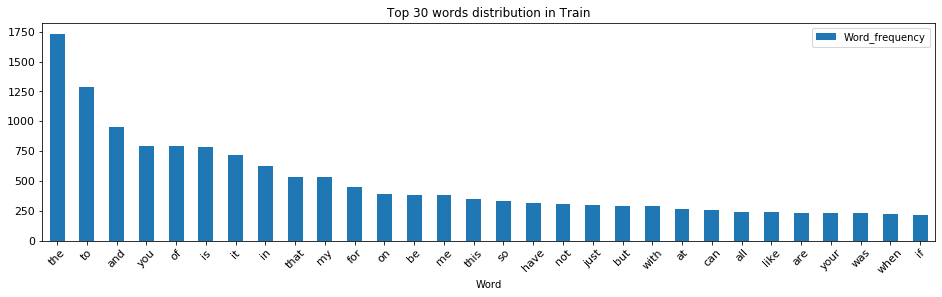

In [7]:
df1 = Show_top_30_words_with_highest_word_frequency(train_df)

df1.index = df1.Word
df1.plot(kind = 'bar',
        title = 'Top 30 words distribution in Train',     
        rot = 45, fontsize = 11, figsize = (16,4))

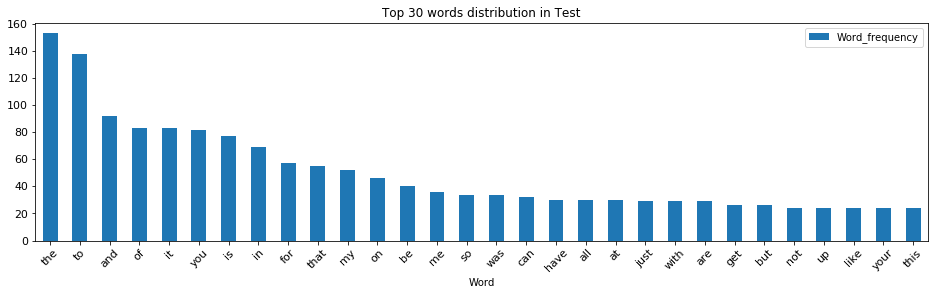

In [8]:
df2 = Show_top_30_words_with_highest_word_frequency(test_df)

df2.index = df2.Word
df2.plot(kind = 'bar',
        title = 'Top 30 words distribution in Test',     
        rot = 45, fontsize = 11, figsize = (16,4))

In [ ]:
# Save to .pkl file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")
## load pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [9]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

def embedding_using_the_TF_IDF_vectorizer(df_train, df_test):
    
    vecterizer = TfidfVectorizer(max_features=1000)
    tfidf = vecterizer.fit_transform(df_train.text)
    tfidf_matrix_train = tfidf.toarray()
    
    tfidf = vecterizer.transform(df_test.text)
    tfidf_matrix_test = tfidf.toarray()
    
    print('Train TF-iDF matrix shape : ', tfidf_matrix_train.shape)
    print('Test TF-iDF matrix shape : ',  tfidf_matrix_test.shape)  
    print('\n')
    print('The 100 ~ 110 feature names : \n', vecterizer.get_feature_names()[100:110])
    
    return tfidf_matrix_train, tfidf_matrix_test

tfidf_matrix_train, tfidf_matrix_test = embedding_using_the_TF_IDF_vectorizer(train_df, test_df)

Train TF-iDF matrix shape :  (3613, 1000)
Test TF-iDF matrix shape :  (347, 1000)


The 100 ~ 110 feature names : 
 ['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody', 'blues', 'body', 'boiling']


In [11]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [12]:
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.64


In [13]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [14]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

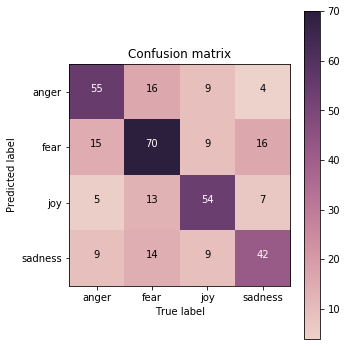

In [16]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

##### Answer here

* First, For the training accuracy and testing accuracy shown above, we can see the decision tree classifier overfits on the training data so much, which achieve 99% accuracy on training, but only get 64% on testing. 
<br>
* Second, We can see the precision and recall for each class from the classification_report. In average, for one emotion in test data, the classifier can succesfully get 64% of them (recall); for one emotion type that the classifer predict, the classifier do 64% right, 36% wrong (precision).
<br>
* Third, The confusion matrix gives us this information : For each class, how many datas the model predict right, and how many datas be classified to other wrong classes. 
<br>
* Last, from the confusion matrix, We can discover the difference between anger, fear and sadness may be more difficult to recognize by the model. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [17]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_1 = clf.predict(X_train)
y_pred_2 = clf.predict(X_test)

print('Naive Bayes Classifier training acc : ', accuracy_score(y_train, y_pred_1))
print('Naive Bayes Classifier testing acc : ', accuracy_score(y_test, y_pred_2))

Naive Bayes Classifier training acc :  0.7929698311652367
Naive Bayes Classifier testing acc :  0.7175792507204611


In [18]:
print(classification_report(y_true=y_test, y_pred=y_pred_2))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

##### Answer here
* First, as we can see above, the naive bayse model got a lower accuracy on training data but better performance on testing data. (In comparison of decision tree model)

* Second, demonstrate the pros and cons for the two model below:

  Decision tree: 
      Pro:
          1. Can easily generate explainable logic for classification.
          2. Can easily fine tune the hyper parameter with some domain knowledge(If we have).
      Con:
          1. Easily overfitting on the training dataset.
  
  Naive bayse:
      Pro:
          1. Use the general statistic information for classification. Not that easy to overfit to much.
      Con:
          1. Performance may be more sensitive due to data label unbalance.
          2. Dependencies between features may decrease the performance.

  The decision tree model here do not restict its model complexity, hence it overfits too much on the training data.
  
  In contrast, naive bayse performs better.
  
  Besides, from the perfomance in each class, we can also see the naive bayes have the best performance on 'fear', the worst
  performance on 'sadness'. Which shows the performance of naive bayse model may be more sensitive due to data label unbalance

In [20]:
import tensorflow as tf
import keras

## deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2964    sadness
1453       fear
1814       fear
3271    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


Using TensorFlow backend.


In [21]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [22]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

In [23]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 172us/step - loss: 1.3204 - accuracy: 0.3878 - val_loss: 1.2658 - val_accuracy: 0.4870
Epoch 2/25
3613/3613 [==============================] - 0s 86us/step - loss: 0.9289 - accuracy: 0.6864 - val_loss: 0.8925 - val_accuracy: 0.6715
Epoch 3/25
3613/3613 [==============================] - 0s 88us/step - loss: 0.5445 - accuracy: 0.8107 - val_loss: 0.7833 - val_accuracy: 0.6830
Epoch 4/25
3613/3613 [==============================] - 0s 81us/step - loss: 0.4009 - accuracy: 0.8505 - val_loss: 0.7778 - val_accuracy: 0.7176
Epoch 5/25
3613/3613 [==============================] - 0s 84us/step - loss: 0.3169 - accuracy: 0.8849 - val_loss: 0.8428 - val_accuracy: 0.6916
Epoch 6/25
3613/3613 [==============================] - 0s 85us/step - loss: 0.2617 - accuracy: 0.9098 - val_loss: 0.9092 - val_accuracy: 0.6916
Epoch 7/25
3613/3613 [==============================] - 0s 88us/step - loss: 0.218

In [24]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.387766,1.320433,0.487032,1.265784
1,1,0.686410,0.928869,0.671470,0.892455
2,2,0.810684,0.544549,0.682997,0.783288
3,3,0.850540,0.400865,0.717579,0.777842
4,4,0.884860,0.316933,0.691643,0.842842
5,5,0.909770,0.261663,0.691643,0.909188
6,6,0.926377,0.218621,0.665706,0.936368
7,7,0.944921,0.179706,0.677233,1.071458
8,8,0.956546,0.151955,0.659942,1.074402
9,9,0.958207,0.137433,0.677233,1.162666


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


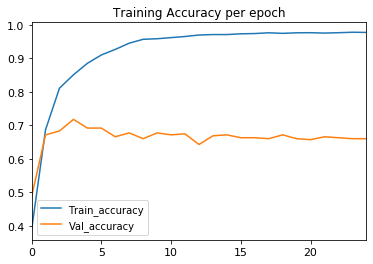

In [25]:
# Answer here
df = pd.DataFrame()
df['Train_accuracy'] = training_log['accuracy']
df['Val_accuracy'] = training_log['val_accuracy']

df.plot(kind = 'line',
        title = 'Training Accuracy per epoch',     
        rot = 0, fontsize = 11, figsize = (6,4))

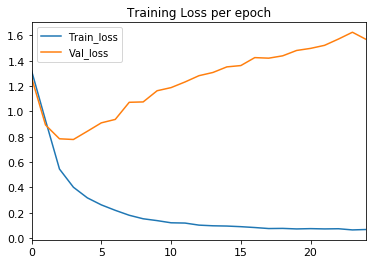

In [26]:
df = pd.DataFrame()
df['Train_loss'] = training_log['loss']
df['Val_loss'] = training_log['val_loss']

df.plot(kind = 'line',
        title = 'Training Loss per epoch',     
        rot = 0, fontsize = 11, figsize = (6,4))

* As we can see above, at epoch 4, validation loss starts to rise and validation accuracy begin decreasing but training performance on training data is still improving. Which means the model starts to overfit on the training data at epoch 4. Hence, the test result will get worse and val_error continue rising.

* The model complexity is too much over for this small dataset, which cause this overfitting. We can add dropout layer to prevent from this.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


#-----------------------------------------------------------------<br>
Skip those blocks for getting the word vectors
#-----------------------------------------------------------------

##### Answer here
* Method I:
        Just concate these vectors into 1-D sequence, then, put it into dense for training.
        (Set limit len, if larger, cut; if shorter, padding)

* Method II:
        Concate these vectors into 2-D matrix, then do few convolution layer to extrac feature, then put into dense.


---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [30]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: \n', angry_words)
print('\n')
print('happy_words: \n', happy_words)
print('\n')
print('sad_words: \n', sad_words)
print('\n')
print('fear_words: \n', fear_words)

angry_words: 
 ['irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']


happy_words: 
 ['glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']


sad_words: 
 ['saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']


fear_words: 
 ['fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


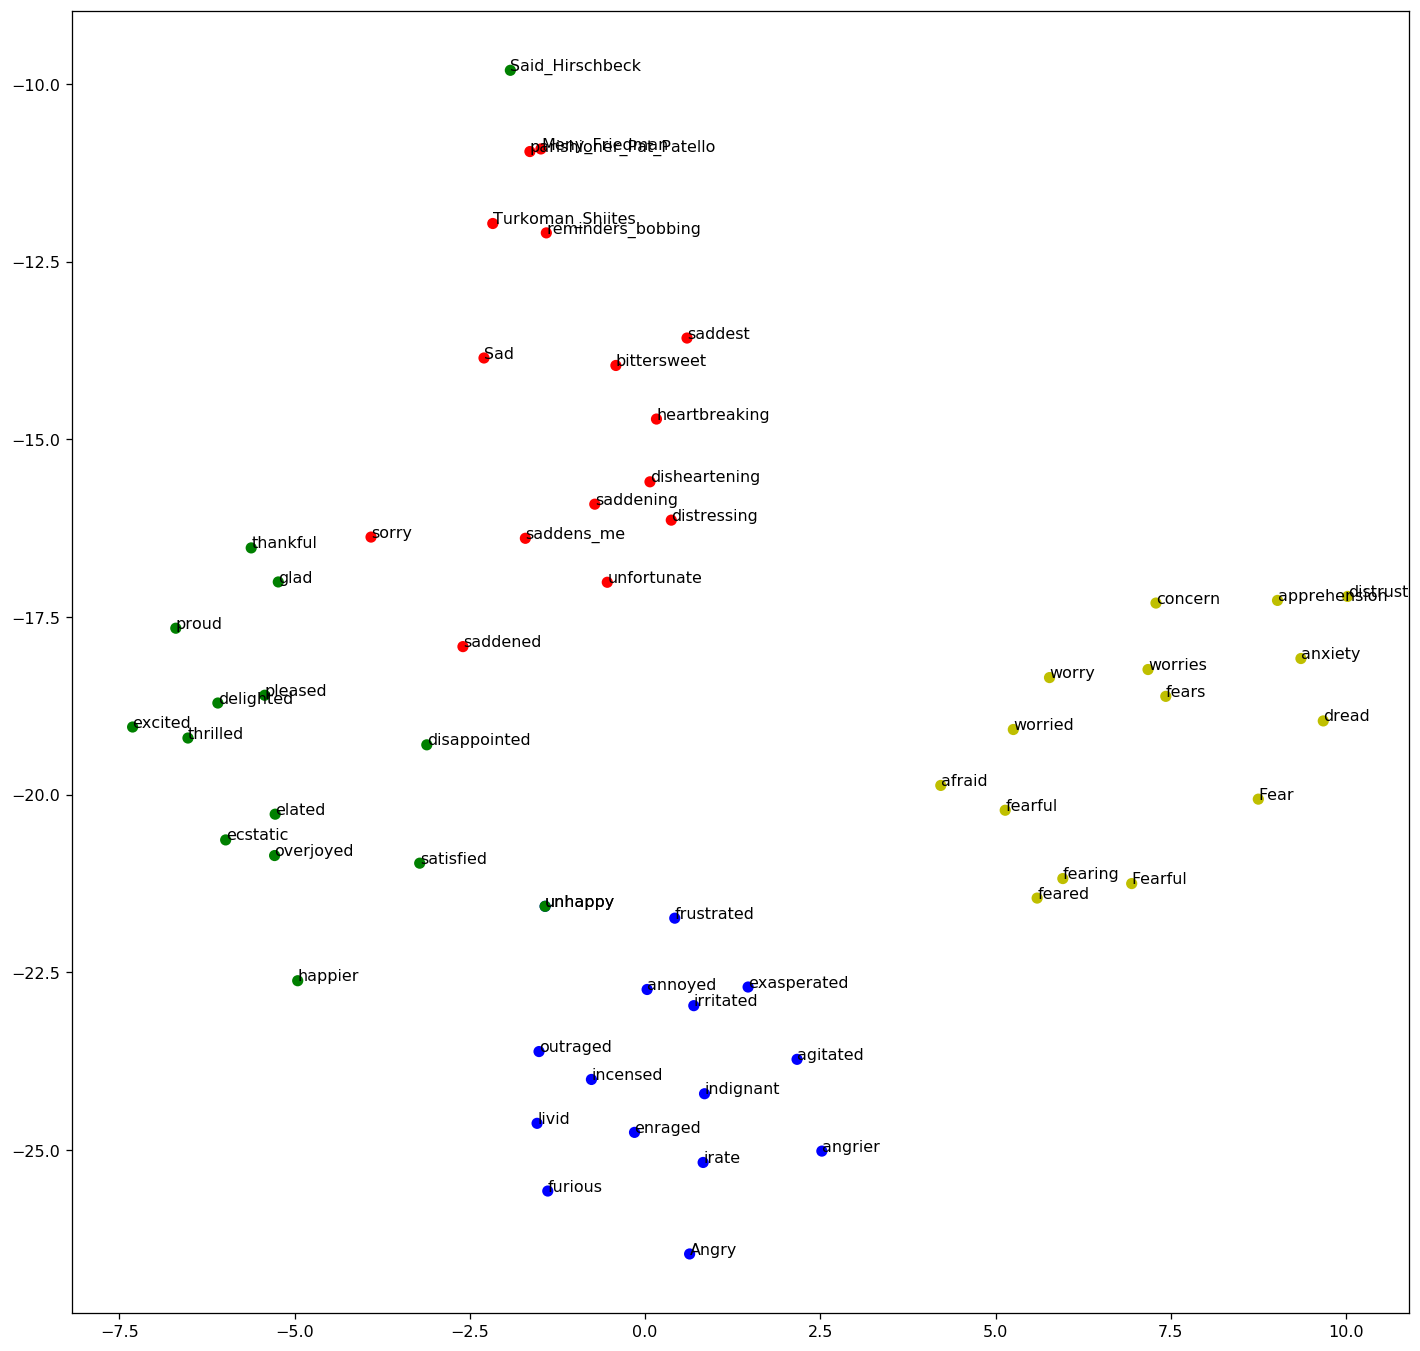

In [31]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

target_words = angry_words + happy_words + sad_words + fear_words

cn = topn 
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(15, 15), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## <center> Part II

* The snapshot of the private leader board ranking has been included on the top cell. 
* Ranked 7th.

## <center> Part III

###### First
    * Load the given dataset and seperate them into Train and Testing data.
    * Save the tidy dataframe into .pkl file

###### Second
    * After shuffing, Take the lastest 200000 files from Train as my validation data.
    * Then, data preprocessing and feature extraction starts ! 
    * Feature's below:

* TFiDF
    1. Do text cleaning by re and beautifulsoup library.
    2. Do lematization before countervecterizor in order to get a more useful tfidf matrix.
    3. Get rid of those stop words and set max_df, min_df for countervecterizor.

* NLTK sentiment analysis
    1. Get a 1* 4 vector for each tweet.

* Impotant words count
    1. not and n't.
    2. why.
    3. when.
    4. how
    5. ?
    6. !


* Sentence length count

* The time for the tweet
    1. (0~24) o'clock

###### Third
    * Try different models to fit the training data.
    * Take the model with the best validation accuracy to predict testing data.
    * Models I've tried below:
   

* RandomForest
    1. Got about 0.48 valid acc.

* XGBOOST
    1. Got about 0.51 valid acc.
    2. Got about 0.41 testing acc on public leader board

* Neural Net Work (just consist of dense)
    1. Got about 0.52 valid acc.
    2. Got about 0.41 testing acc on public leader board

###### Fourth
    * I tried a lot to do feature extraction and I found that the feature 'tweet time' is really helpful.
    * Those words counting for 'when, how, why not' do not show obvious improvement on the valid acc.

    * After doing a while, I think that the traditional way like tdidf and BOW may not that useful in this emotion prediction case. Because lots of emotions is been expressed by words combination but Tfidf method do not considered the order of the sentence. 
    For example, 'I may eat that cake later' is really different from 'May I eat that cake later'.
    For another example, 'Yor are so handsome! I am so ugly.' is really different from 'You are so ugly but I am so hansome'. But they shares the same tfidf matrix.

##### As the result, I want to solve this problem in a sequential learning way

* The most quick way to imply is to build a pretrained BERT model in tensorflow.
* Do the transfer learning on this dataset

* BERT
    1. Got about 0.66 valid acc.
    2. Got about 0.54 testing acc on public leader board
    
    <br>
* Vote for few BERT checkpoints
    1. Got about 0.55 testing acc on public leader board

* For BERT, I've tried fix it in two ways.<br>
One is fit by raw tweet data.<br>
One is fit by text-cleaned data which get rid of those @abcde..., #... redundant words.<br>
Suprisely, the performance of both are similar, the second one do not show the improvent as I expect.

## Some codes below: 

###### Bert Part

* Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from transformers import BertTokenizer

* Data generators

In [ ]:
class T_DatasetGenerator:

    def __init__(self, Data_path, Label_path, begin, end):
        self.categories = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
        
        self.df_data = pd.read_pickle(Data_path)
        self.df_label = pd.read_pickle(Label_path)
        
        #self.df_data['tweet_text'] = self.df_data.tweet_text.apply(lambda x: self.clean_text(x))
        
        self.data = list(self.df_data['tweet_text'][begin:end])
        self.label = list(self.df_label['emotion'][begin:end])
        del self.df_data
        del self.df_label
        self.data_tranpose = np.array([self.data, self.label]).T
        
        self.data_tuple = tuple(self.data_tranpose) 
        
        # Bert
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

        self.input_ids_list = []
        self.token_type_ids_list = []
        self.attention_mask_list = []
        self.label_list = []
        
        for data, label in self.data_tuple:
            bert_input = self.get_bert_input(80, data)
            
            self.input_ids_list.append(bert_input['input_ids'])
            self.token_type_ids_list.append(bert_input['token_type_ids'])
            self.attention_mask_list.append(bert_input['attention_mask'])
            
            self.label_list.append(self.label_transform(label))
    
    def clean_text(self, text):
        text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
        text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)

        return text
    
    
    def get_bert_input(self, max_length_limit, sentences):
        
        return self.tokenizer.encode_plus(
                            sentences,                      
                            add_special_tokens = True, # add [CLS], [SEP]
                            max_length = max_length_limit, # max length of the text that can go to BERT
                            pad_to_max_length = True, # add [PAD] tokens
                            return_attention_mask = True # add attention mask to not focus on pad tokens
                  )    
    
    def label_transform(self, x):
        return self.categories.index(x)
    
    def map_example_to_dict(self, input_ids, attention_masks, token_type_ids, label):
        label_onehot = tf.one_hot(label, depth = 8)
        return {
              "input_ids": input_ids,
              "token_type_ids": token_type_ids,
              "attention_mask": attention_masks,
               }, label, label_onehot

    def generate(self, N, BATCH_SIZE):
        dataset = tf.data.Dataset.from_tensor_slices((self.input_ids_list, self.attention_mask_list, self.token_type_ids_list, self.label_list))
        dataset = dataset.map(self.map_example_to_dict, num_parallel_calls = tf.data.experimental.AUTOTUNE)
        dataset = dataset.shuffle(N)
        dataset = dataset.batch(BATCH_SIZE,True)

        return dataset

In [ ]:
class V_DatasetGenerator:

    def __init__(self, Data_path, Label_path, begin, end):
        self.categories = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust', 'joy']
        
        self.df_data = pd.read_pickle(Data_path)
        self.df_label = pd.read_pickle(Label_path)
        
        self.df_data['tweet_text'] = self.df_data.tweet_text.apply(lambda x: self.clean_text(x))
        
        self.data = list(self.df_data['tweet_text'][begin:end])
        self.label = list(self.df_label['emotion'][begin:end])
        del self.df_data
        del self.df_label
        self.data_tranpose = np.array([self.data, self.label]).T
        
        self.data_tuple = tuple(self.data_tranpose) 
        
        # Bert
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

        self.input_ids_list = []
        self.token_type_ids_list = []
        self.attention_mask_list = []
        self.label_list = []
        
        for data, label in self.data_tuple:
            bert_input = self.get_bert_input(80, data)
            
            self.input_ids_list.append(bert_input['input_ids'])
            self.token_type_ids_list.append(bert_input['token_type_ids'])
            self.attention_mask_list.append(bert_input['attention_mask'])
            
            self.label_list.append(self.label_transform(label))
    
    def clean_text(self, text):
        text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
        text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)

        return text
    
    def get_bert_input(self, max_length_limit, sentences):
        
        return self.tokenizer.encode_plus(
                            sentences,                      
                            add_special_tokens = True, # add [CLS], [SEP]
                            max_length = max_length_limit, # max length of the text that can go to BERT
                            pad_to_max_length = True, # add [PAD] tokens
                            return_attention_mask = True # add attention mask to not focus on pad tokens
                  )    
    
    def label_transform(self, x):
        return self.categories.index(x)
    
    def map_example_to_dict(self, input_ids, attention_masks, token_type_ids, label):
        label_onehot = tf.one_hot(label, depth = 8)
        return {
              "input_ids": input_ids,
              "token_type_ids": token_type_ids,
              "attention_mask": attention_masks,
               }, label, label_onehot

    def generate(self, BATCH_SIZE):
        dataset = tf.data.Dataset.from_tensor_slices((self.input_ids_list, self.attention_mask_list, self.token_type_ids_list, self.label_list))
        dataset = dataset.map(self.map_example_to_dict, num_parallel_calls = tf.data.experimental.AUTOTUNE)
        dataset = dataset.batch(BATCH_SIZE,True)

        return dataset

In [ ]:
class Test_DatasetGenerator:

    def __init__(self, Data_path):

        self.df_data = pd.read_pickle(Data_path)      
        
        #self.df_data['tweet_text'] = self.df_data.tweet_text.apply(lambda x: self.clean_text(x))
        
        self.data = list(self.df_data['tweet_text'])
        del self.df_data

        #self.data_tuple = tuple(self.data_tranpose) 
        
        # Bert
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

        self.input_ids_list = []
        self.token_type_ids_list = []
        self.attention_mask_list = []
        
        for data in self.data:
            bert_input = self.get_bert_input(80, data)
            
            self.input_ids_list.append(bert_input['input_ids'])
            self.token_type_ids_list.append(bert_input['token_type_ids'])
            self.attention_mask_list.append(bert_input['attention_mask'])
            
    def clean_text(self, text):
        text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
        text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)

        return text
    
    def get_bert_input(self, max_length_limit, sentences):
        
        return self.tokenizer.encode_plus(
                            sentences,                      
                            add_special_tokens = True, # add [CLS], [SEP]
                            max_length = max_length_limit, # max length of the text that can go to BERT
                            pad_to_max_length = True, # add [PAD] tokens
                            return_attention_mask = True # add attention mask to not focus on pad tokens
                  )    
    
    def map_example_to_dict(self, input_ids, attention_masks, token_type_ids):
        
        return {
              "input_ids": input_ids,
              "token_type_ids": token_type_ids,
              "attention_mask": attention_masks,
               }

    def generate(self, BATCH_SIZE):
        dataset = tf.data.Dataset.from_tensor_slices((self.input_ids_list, self.attention_mask_list, self.token_type_ids_list))
        dataset = dataset.map(self.map_example_to_dict, num_parallel_calls = tf.data.experimental.AUTOTUNE)
        dataset = dataset.batch(BATCH_SIZE,True)

        return dataset

In [ ]:
Train_G = T_DatasetGenerator('./Data/Train_Data.pkl','./Data/Train_Label.pkl', 0, 1400000)
train_dataset = Train_G.generate(1000000, 40)
train_dataset

In [ ]:
Valid_G = V_DatasetGenerator('./Data/Train_Data.pkl','./Data/Train_Label.pkl', 1200000, 1400000)
valid_dataset = Valid_G.generate(50)
valid_dataset

In [ ]:
Test_G = Test_DatasetGenerator('./Data/Test_Data.pkl')
test_dataset = Test_G.generate(132)
test_dataset

* Model build

In [ ]:
from transformers import TFBertForSequenceClassification

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 8

My_model = TFBertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

* Define my loss function which can deal with data unbalance

In [ ]:
def my_loss(onehot_label, Result):

    #class_weight = tf.constant([12, 2, 3.7, 8, 2.6, 10.6, 2.5, 1], dtype=tf.float32)
    class_weight = tf.constant([1, 1, 1, 1, 1, 1, 1, 1], dtype=tf.float32)
    
    weights = tf.reduce_sum(class_weight * onehot_label, axis=1)
    
    unweighted_loss = tf.keras.losses.categorical_crossentropy(onehot_label, Result[0], from_logits=True)

    weighted_loss = unweighted_loss * weights
    
    loss = tf.reduce_mean(unweighted_loss)
    
    return loss

* Learning rate and optimizer

In [ ]:
LEARNING_RATE = 2 * 1e-5
My_model_optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

* Train step function

In [ ]:
@tf.function
def train_step(onehot, Img):
    
    with tf.GradientTape() as gen_tape:

        Result = My_model(Img,training = True)
    #########################################################################################
        loss = my_loss(onehot, Result)
        #loss = tf.reduce_mean(tf.square(Label -  Result)) 
    #########################################################################################
    grad_g = gen_tape.gradient(loss, My_model.trainable_variables)

    My_model_optimizer.apply_gradients(zip(grad_g, My_model.trainable_variables))
    return loss

* My predict step

In [ ]:
def predict(data):
    x = []
    y = []
    for  Img, Label, onehot in data:
        Result = My_model(Img,training = True)
        Result = Result[0]
        x = tf.concat([x,tf.math.argmax(Result, 1)],0)
        
        y = tf.concat([y,Label],0)
        #print(tf.math.argmax(Result, 1))
        #print(Label)
    
    m = tf.keras.metrics.Accuracy()
    _ = m.update_state(y, x)
    #print(m.result().numpy())
    return m.result().numpy(), x

* Start training

In [ ]:
from datetime import datetime

print("{}, start training.".format(datetime.now()))
#---------------------------------------------------

for epoch in range(3):
    cnt = 0
    total_loss = 0
    for Img, Label, onehot in train_dataset:
        loss = train_step(onehot, Img)
        total_loss = total_loss + loss.numpy()

    acc, y = predict(valid_dataset)  

    print("{}, Epoch {}: loss {:.2f} => valid_acc {:.4f}".format(datetime.now(), epoch+1, total_loss, acc))   

* Get the final prediction for testing data

In [ ]:
x = []
for  Img in test_dataset:
    Result = My_model(Img,training = True)
    Result = Result[0]
    x = tf.concat([x,tf.math.argmax(Result, 1)],0)

ans = x.numpy()

###### XGBOOST Part

* Text cleaning and lematization

In [ ]:
import re
from bs4 import BeautifulSoup
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

class DatasetGenerator:

    def __init__(self):
        # Creat glove dictionary
        self.embeddings_dict = {}

    def preprocessor(self, text):
        # remove <LH>
        text = BeautifulSoup(text, 'html.parser').get_text()
        r = '(?::|;|=|X)(?:-)?(?:\)|\(|D|P)'
        emoticons = re.findall(r, text)
        text = re.sub(r, '', text)
        text = re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-','')
        return text

    def get_wordnet_pos(self, tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

    def lema(self, sentence):            ############For lemmatization
        
        tokens = word_tokenize(sentence)  
        tagged_sent = pos_tag(tokens)     

        wnl = WordNetLemmatizer()
        lemmas_sent = ''
        for tag in tagged_sent:
            wordnet_pos = self.get_wordnet_pos(tag[1]) or wordnet.NOUN
            lemmas_sent = lemmas_sent + ' ' + (wnl.lemmatize(tag[0], pos=wordnet_pos)) 

        return lemmas_sent    

* NLTK sentiment analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
def nltk_sen(sen):
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(sen)

    return list(ss.values())

* Some counters

In [ ]:
# Sentence len
def num_cnt(sen):
    return len(sen.split(' '))
# not number
def not_cnt(sen):
    return len(sen.split(' not ')) + len(sen.split("n't")) -2
# why number
def why_cnt(sen):
    return len(sen.split(' why ')) -1
# how number
def how_cnt(sen):
    return len(sen.split(' how ')) -1
# when number
def when_cnt(sen):
    return len(sen.split(' when ')) -1
# ? number
def question_cnt(sen):
    return len(sen.split(' ? ')) -1
# ! number
def sup_cnt(sen):
    return len(sen.split(' ! ')) -1

* Tweet time

In [ ]:
def date_pick(date):
        
    return int(date.split(' ')[1].split(':')[0])

* TFIDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
vecterizer = CountVectorizer(max_df = 0.5, min_df = 0.0004, stop_words = 'english')
count = vecterizer.fit_transform(df_t.Sentence)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(count)
tfidf_matrix = tfidf.toarray()
tfidf_matrix.shape

In [ ]:
count_test = vecterizer.transform(new_df_test.Sentence)
tfidf_test = transformer.transform(count_test)
tfidf_matrix_test = tfidf_test.toarray()
tfidf_matrix_test.shape

* XGBOOST Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtrain = xgb.DMatrix(Train.datas[1000000:1200000], label=Train.labels[1000000:1200000])
dvalid = xgb.DMatrix(Valid.datas[0:200000], label=Valid.labels[0:200000])
dtest = xgb.DMatrix(Test.datas)

param = {'max_depth': 7, 'eta': 0.3, 'objective': 'multi:softmax', 'num_class':8}
param['eval_metric'] = 'mlogloss'
param['gpu_id'] = 0
param['tree_method'] = 'gpu_hist'
evallist = [(dvalid, 'eval')]

num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist)

y_pred = bst.predict(dvalid)
accuracy_score(y, y_pred)

In [32]:
# The code is too long so far, skip the random forest and neural network fitting parts. 
# Just fitting the same data matrix XGBOOST used.

# <center>END